In [ ]:
!pip install hvplot
import holoviews as hv
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import hvplot.pandas

data = pd.read_csv('https://tinyurl.com/ChrisCoDV/001143792/DailyCustomers.csv', index_col=0)
data.index = pd.to_datetime(data.index)

print(data)
print(data.head())
print(data.tail())
print(data.describe())
print(data.sum())

            NAQ  BZM  MUY  PGL  ZSD   SMM  ...  AEI  NMO  MAJ  ATT  NGB  OSG
Date                                       ...                              
2019-01-01  414   64  340  417    0   970  ...    0    0    0   60    0  482
2019-01-02  447   85  378  399    0  1049  ...    0    0    0   65    0  528
2019-01-03  321   85  398  348    0   729  ...    0    0    0   55    0  540
2019-01-04  343   71  262  314    0   918  ...    0    0    0   57    0  442
2019-01-05  341   74  239  292    0   739  ...    0    0    0   59    0  461
...         ...  ...  ...  ...  ...   ...  ...  ...  ...  ...  ...  ...  ...
2019-12-27  392   75  340  332  126   843  ...   97  107   31   58   90  383
2019-12-28  397   85  259  352  139   952  ...   48  112  194   61   42  449
2019-12-29  505   65  362  375    0   894  ...   17   93  117   55  183  659
2019-12-30  475   75  317  413  114   987  ...    4   56  185   50  141  523
2019-12-31  452   88  391  420  123  1017  ...  107  142    0   60    3  556

All necessary libaries are imported.
At first the csv file of the dailyCustomers is loaded. It shows there are 365 rows x 40 columns. The time period is a year, 2019

In [ ]:
marketing = pd.read_csv('https://tinyurl.com/ChrisCoDV/001143792/StoreMarketing.csv', index_col=0)
overheads = pd.read_csv('https://tinyurl.com/ChrisCoDV/001143792/StoreOverheads.csv', index_col=0)
size = pd.read_csv('https://tinyurl.com/ChrisCoDV/001143792/StoreSize.csv', index_col=0)
staff = pd.read_csv('https://tinyurl.com/ChrisCoDV/001143792/StoreStaff.csv', index_col=0)

summary_data = pd.DataFrame(index=data.columns)
summary_data['Customers'] = data.sum().values
summary_data['Size'] = size.values
summary_data['Staff'] = staff.values
summary_data['Marketing'] = marketing.values
summary_data['Overheads'] = overheads.values

print(summary_data.head())

     Customers  Size  Staff  Marketing  Overheads
NAQ     148670  1176     10      16000      60000
BZM      27928   489      4       3000      48000
MUY     122811  1905      9      12000      27000
PGL     135632  1154      7      14000      34000
ZSD       5240   109      1       1000      65000


The rest of the csv files are complied and stored in one dataframe to analyze different visualizations from them. Here each row represents the stores and columns represents the information of it compiled from the dataframe.

High: ['SMM', 'SGA', 'QSN', 'RAH']
Medium: ['NAQ', 'MUY', 'PGL', 'PAA', 'OMV', 'QMD', 'RGS', 'OSG']
Low: ['BZM', 'VSM', 'CFG', 'WMB', 'TSE', 'WYG', 'EFN', 'YGY', 'UMU', 'TAP', 'ENY', 'BTB', 'UGJ', 'XML']
Very Low: ['ZSD', 'YYO', 'ZMS', 'WGR', 'VYZ', 'DZT', 'DTJ', 'CNQ', 'XSV', 'AEI', 'NMO', 'MAJ', 'ATT', 'NGB']


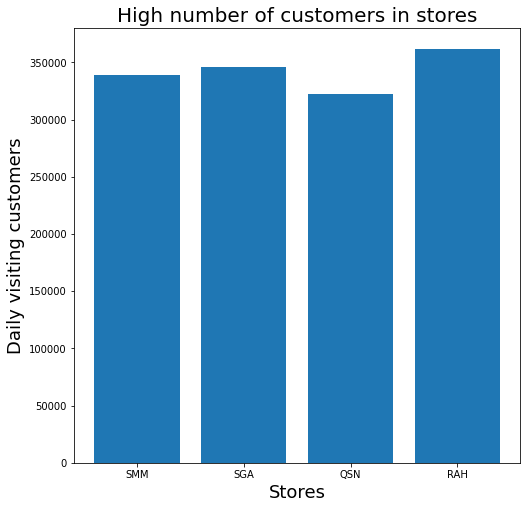

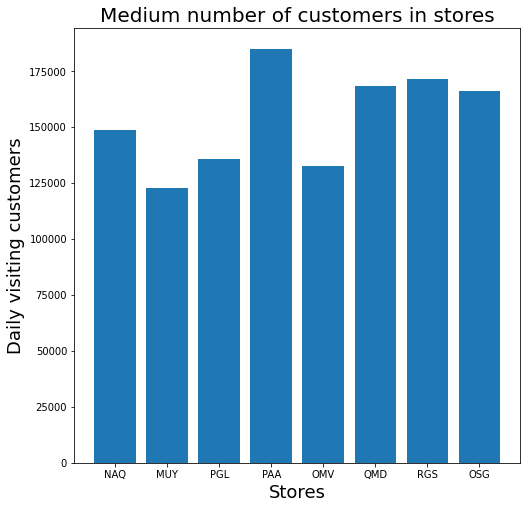

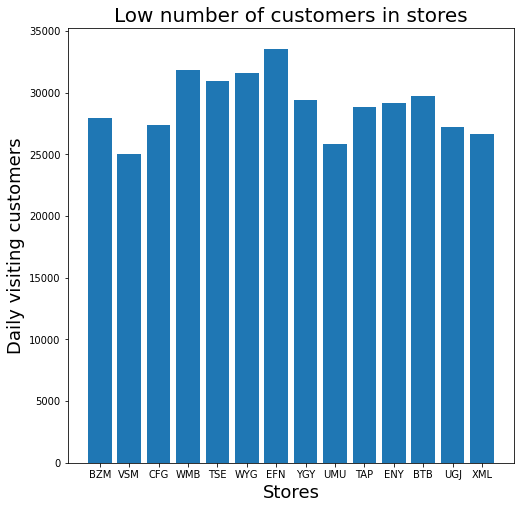

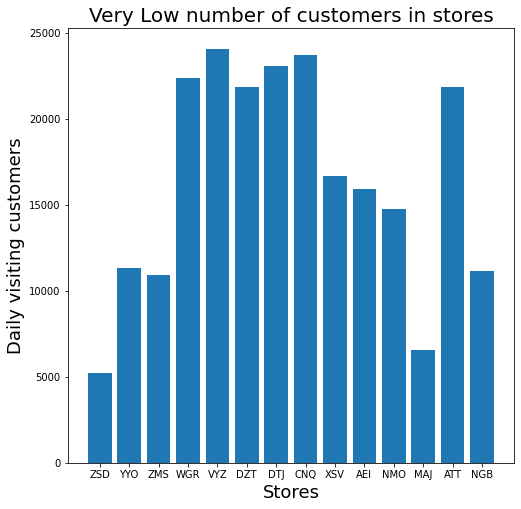

In [ ]:
categories = ['High', 'Medium', 'Low', 'Very Low']
categories_selected = [[] for i in range(len(categories))]
for name in data.columns:
    total_customers = data[name].sum()
    if total_customers > 300_000:
        category = 0
    elif total_customers > 100_000:
        category = 1
    elif total_customers > 25000:
        category = 2
    else:
        category = 3
    categories_selected[category].append(name)
    # print('Product ' + name + ' is ' + categories[category] + ' volume')

for i in range(len(categories)):
    print(categories[i] + ': ' + str(categories_selected[i]))

for i, selected in enumerate(categories_selected):
    plt.figure(figsize=(8, 8))
    x_pos = np.arange(len(data[selected].columns))
    plt.bar(x_pos, data[selected].sum(), align='center')
    plt.xticks(x_pos, data[selected].columns)
    plt.xlabel('Stores', fontsize=18)
    plt.ylabel('Daily visiting customers', fontsize=18)
    plt.title(categories[i] + ' number of customers in stores', fontsize=20)
    plt.show()


The stores in the lower range are of many in numbers, that is why a bar chart is drawn categoring them into different sectors to see the data in a more detailed way.

            NAQ  BZM  MUY  PGL   SMM  VSM  ...  NMO  ATT  NGB  OSG  Others  Others
Date                                       ...                                    
2019-01-01  414   64  340  417   970   77  ...    0   60    0  482       0       0
2019-01-02  447   85  378  399  1049   52  ...    0   65    0  528       0       0
2019-01-03  321   85  398  348   729   77  ...    0   55    0  540       0       0
2019-01-04  343   71  262  314   918   58  ...    0   57    0  442       0       0
2019-01-05  341   74  239  292   739   71  ...    0   59    0  461       0       0

[5 rows x 40 columns]


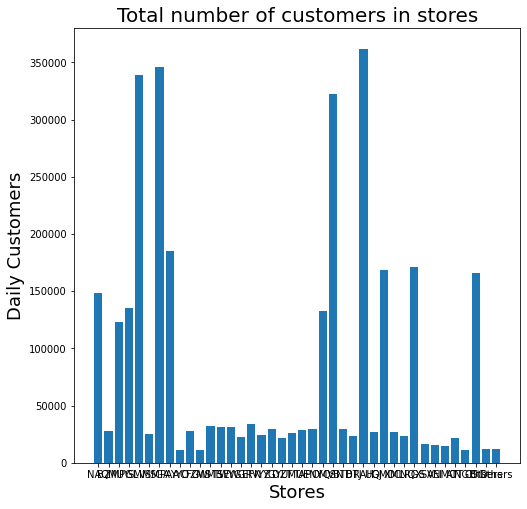

In [ ]:
selected = []
data['Others'] = [0] * len(data.index)
for name in data.columns:
    total_customers = data[name].sum()
    if total_customers > 10000:
        selected.append(name)
    else:
        data['Others'] += data[name]
selected.append('Others')
print(data[selected].head())

plt.figure(figsize=(8, 8))
x_pos = np.arange(len(selected))
plt.bar(x_pos, data[selected].sum(), align='center')
plt.xticks(x_pos, selected)
plt.xlabel('Stores', fontsize=18)
plt.ylabel('Daily Customers', fontsize=18)
plt.title('Total number of customers in stores', fontsize=20)
plt.show()

A bar chart is drawn to see the ditribution of the stores.It is grouped and then sorted with the highest being the first.

             RAH   SGA   SMM  QSN  PAA  RGS  ...  NAQ  PGL  OMV  MUY  Others  Others
Date                                         ...                                    
2019-01-01  1244  1030   970  913  550  511  ...  414  417  497  340    1617    1617
2019-01-02   786  1045  1049  984  526  333  ...  447  399  398  378    1585    1585
2019-01-03   996   880   729  495  489  449  ...  321  348  355  398    1660    1660
2019-01-04   600   894   918  882  452  341  ...  343  314  365  262    1669    1669
2019-01-05   780   873   739  999  451  263  ...  341  292  353  239    1640    1640

[5 rows x 14 columns]


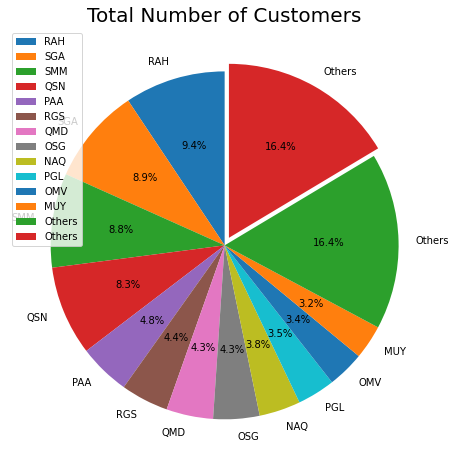

In [ ]:
# sort the data according to the sum of each column
data = data.reindex(data.sum().sort_values(ascending=False).index, axis=1)

explodeList = []
selected = []
data['Others'] = [0] * len(data.index)
for name in data.columns:
    total_customers = data[name].sum()
    if total_customers > 100000:
        selected.append(name)
        explodeList.append(0)
    else:
        data['Others'] += data[name]
selected.append('Others')
explodeList.append(0.05)
print(data[selected].head())

plt.figure(figsize=(8, 8))
plt.pie(data[selected].sum(), labels=selected, autopct='%1.1f%%', startangle=90, explode=explodeList)
plt.title('Total Number of Customers', fontsize=20)
plt.legend(loc=2)
plt.show()

A pie chart is drawn to see the overall distribution of the dataset in a more clear way compared to the bar chart.

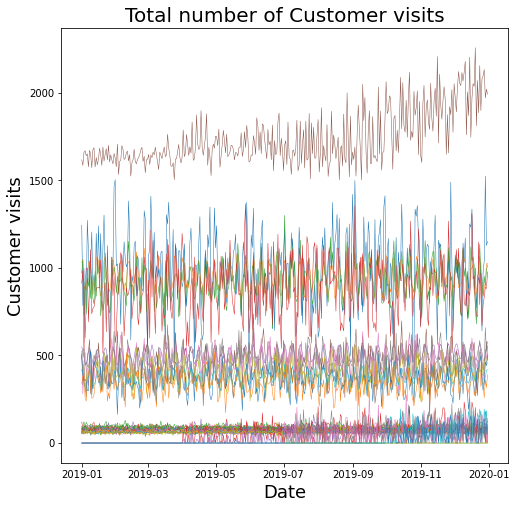

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(data, linewidth=0.5)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Customer visits', fontsize=18)
plt.title('Total number of Customer visits', fontsize=20)
plt.show()

A line plot to represent the data, but there is too much noise, so we will see the data in segmented manner.

            NAQ  MUY  PGL  PAA  OMV  QMD  RGS  OSG
Date                                              
2019-01-01  414  340  417  550  497  525  511  482
2019-01-02  447  378  399  526  398  280  333  528
2019-01-03  321  398  348  489  355  465  449  540
2019-01-04  343  262  314  452  365  517  341  442
2019-01-05  341  239  292  451  353  414  263  461
            NAQ  MUY  PGL  PAA  OMV  QMD  RGS  OSG
Date                                              
2019-12-27  392  340  332  476  301  387  418  383
2019-12-28  397  259  352  470  339  346  475  449
2019-12-29  505  362  375  507  463  512  487  659
2019-12-30  475  317  413  549  441  483  581  523
2019-12-31  452  391  420  579  503  551  473  556


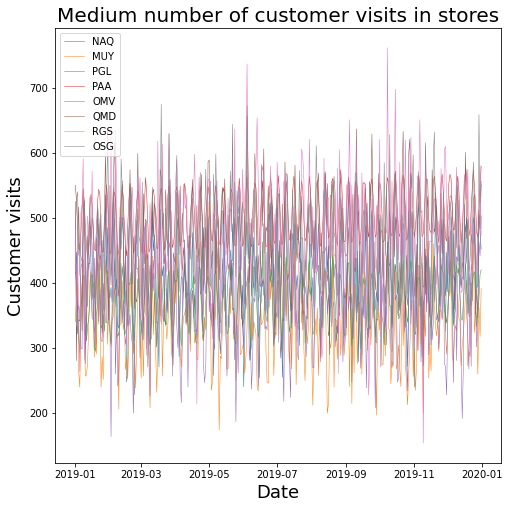

In [ ]:
selected = ['NAQ', 'MUY', 'PGL', 'PAA', 'OMV', 'QMD', 'RGS', 'OSG']
print(data[selected].head())
print(data[selected].tail())
plt.figure(figsize=(8, 8))
plt.plot(data[selected], linewidth=0.5)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Customer visits', fontsize=18)
plt.title('Medium number of customer visits in stores', fontsize=20)
plt.legend(selected, loc=2)
plt.show()

A line for the medium segmented data that contains the total number of the daily customers, but there is still noise.

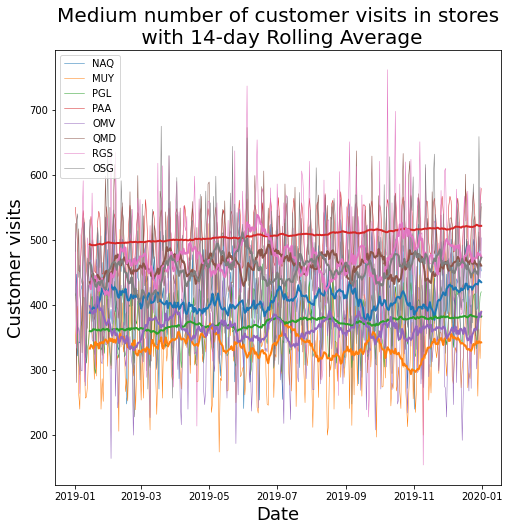

In [ ]:
period = 14
rolling_average = data.rolling(window=period).mean()

plt.figure(figsize=(8, 8))
plt.plot(data[selected], linewidth=0.5)
plt.gca().set_prop_cycle(None)
plt.plot(rolling_average[selected], linewidth=2)
# plt.ylim(ymin=0)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Customer visits', fontsize=18)
plt.title('Medium number of customer visits in stores\n with 14-day Rolling Average', fontsize=20)
plt.legend(selected, loc=2)
plt.show()

I can see trends here in the stores as I  have used the rolling average to obscure the noise in the data, but it is too much of obscure

            BZM  VSM  CFG  WMB  TSE  WYG  ...  UMU  TAP  ENY  BTB  UGJ  XML
Date                                      ...                              
2019-01-01   64   77   72  120   81   84  ...   63   81   76   82   53   62
2019-01-02   85   52   70   85   69   72  ...   54   77   92   75   79   81
2019-01-03   85   77   63   77   94   83  ...   91   72   74   84   85   78
2019-01-04   71   58   76   94  100   93  ...   55   86   90   71   94   77
2019-01-05   74   71   57   90  101   93  ...   60   83   62   67   79   72

[5 rows x 14 columns]
            BZM  VSM  CFG  WMB  TSE  WYG  ...  UMU  TAP  ENY  BTB  UGJ  XML
Date                                      ...                              
2019-12-27   75   68   72   91   91   91  ...   66   79   81  110   91   59
2019-12-28   85   55   77   81   94   86  ...   80   71   80   90   84   60
2019-12-29   65   78   86   68   86   91  ...   63   88   61   73   82   93
2019-12-30   75   76   78   81  100   92  ...   82   77   83   91

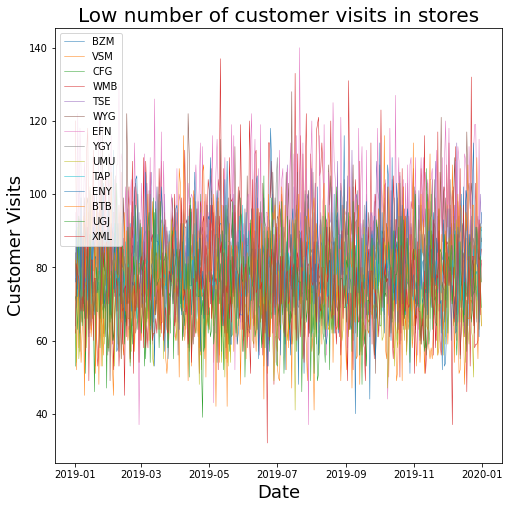

In [ ]:
selected = ['BZM', 'VSM', 'CFG', 'WMB', 'TSE', 'WYG', 'EFN', 'YGY', 'UMU', 'TAP', 'ENY', 'BTB', 'UGJ', 'XML']
print(data[selected].head())
print(data[selected].tail())
plt.figure(figsize=(8, 8))
plt.plot(data[selected], linewidth=0.5)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Customer Visits', fontsize=18)
plt.title('Low number of customer visits in stores', fontsize=20)
plt.legend(selected, loc=2)
plt.show()

To know more for the low stores, I am investigating the stores with lower number of visitors. There is much noise here as well.

            BZM  VSM  CFG  WMB  TSE  WYG  ...  UMU  TAP  ENY  BTB  UGJ  XML
Date                                      ...                              
2019-01-01   64   77   72  120   81   84  ...   63   81   76   82   53   62
2019-01-02   85   52   70   85   69   72  ...   54   77   92   75   79   81
2019-01-03   85   77   63   77   94   83  ...   91   72   74   84   85   78
2019-01-04   71   58   76   94  100   93  ...   55   86   90   71   94   77
2019-01-05   74   71   57   90  101   93  ...   60   83   62   67   79   72

[5 rows x 14 columns]


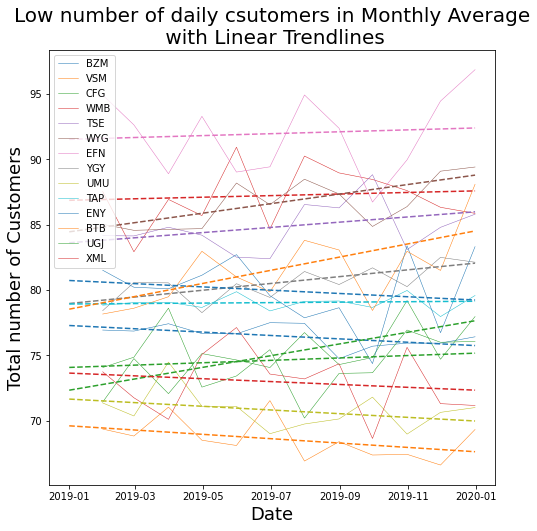

In [ ]:
period = 7
rolling_average = data.rolling(window=period).mean()

print(data[selected].head())

plt.figure(figsize=(8, 8))
plt.plot(averaged_data[selected], linewidth=0.5)
plt.gca().set_prop_cycle(None)
for name in selected:
    x = np.arange(len(data[name]))
    z = np.polyfit(x, data[name], 1)
    trend = np.poly1d(z)
    plt.plot(data.index, trend(x), linestyle='--')
# plt.ylim(ymin=0)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Total number of Customers', fontsize=18)
plt.title('Low number of daily csutomers in Monthly Average\n with Linear Trendlines', fontsize=20)
plt.legend(selected, loc=2)
plt.show()


To reduce the noise, I have used the monthly average data with linear trendlines. It is much clearer now as it shows how some stores has increase in number of the visitors as the area passes by.

            VYZ  CNQ  DTJ  WGR  ATT  DZT  ...  NMO  YYO  NGB  ZMS  MAJ  ZSD
Date                                      ...                              
2019-01-01   64   66   60   57   60   58  ...    0    0    0   55    0    0
2019-01-02   55   63   71   66   65   68  ...    0    0    0   63    0    0
2019-01-03   62   59   62   71   55   56  ...    0    0    0   48    0    0
2019-01-04   70   58   65   61   57   68  ...    0    0    0   73    0    0
2019-01-05   66   70   74   58   59   59  ...    0    0    0   62    0    0

[5 rows x 14 columns]
            VYZ  CNQ  DTJ  WGR  ATT  DZT  ...  NMO  YYO  NGB  ZMS  MAJ  ZSD
Date                                      ...                              
2019-12-27   62   71   92   64   58   61  ...  107  101   90    0   31  126
2019-12-28   72   57   45   69   61   52  ...  112  139   42    0  194  139
2019-12-29   81   69   62   64   55   62  ...   93   30  183    0  117    0
2019-12-30   46   76   53   54   50   59  ...   56   27  141    0

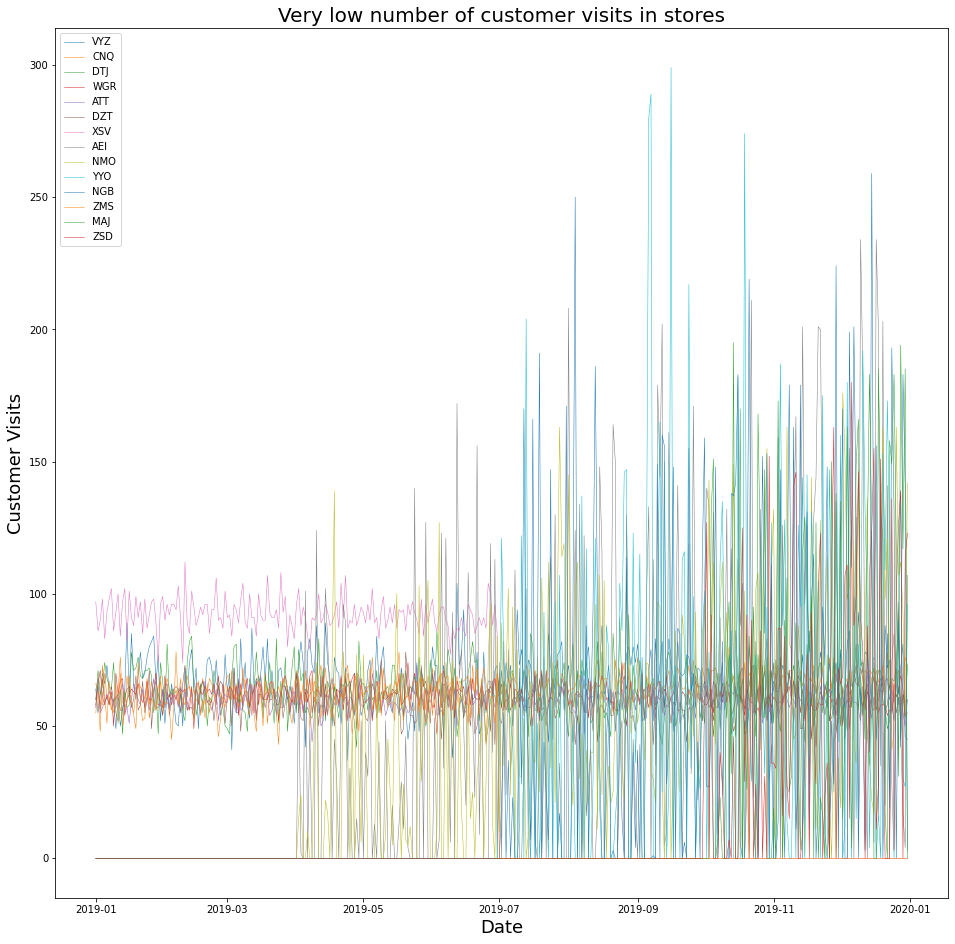

In [ ]:
selected = ['VYZ', 'CNQ', 'DTJ', 'WGR', 'ATT', 'DZT', 'XSV', 'AEI', 'NMO', 'YYO', 'NGB', 'ZMS', 'MAJ', 'ZSD']
print(data[selected].head())
print(data[selected].tail())
plt.figure(figsize=(16,16))
plt.plot(data[selected], linewidth=0.5)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Customer Visits', fontsize=18)
plt.title('Very low number of customer visits in stores', fontsize=20)
plt.legend(selected, loc=2)
plt.show()

To get more insights of the new stores , and stores closing around I am investigating the lower range of the stores that have less customers.

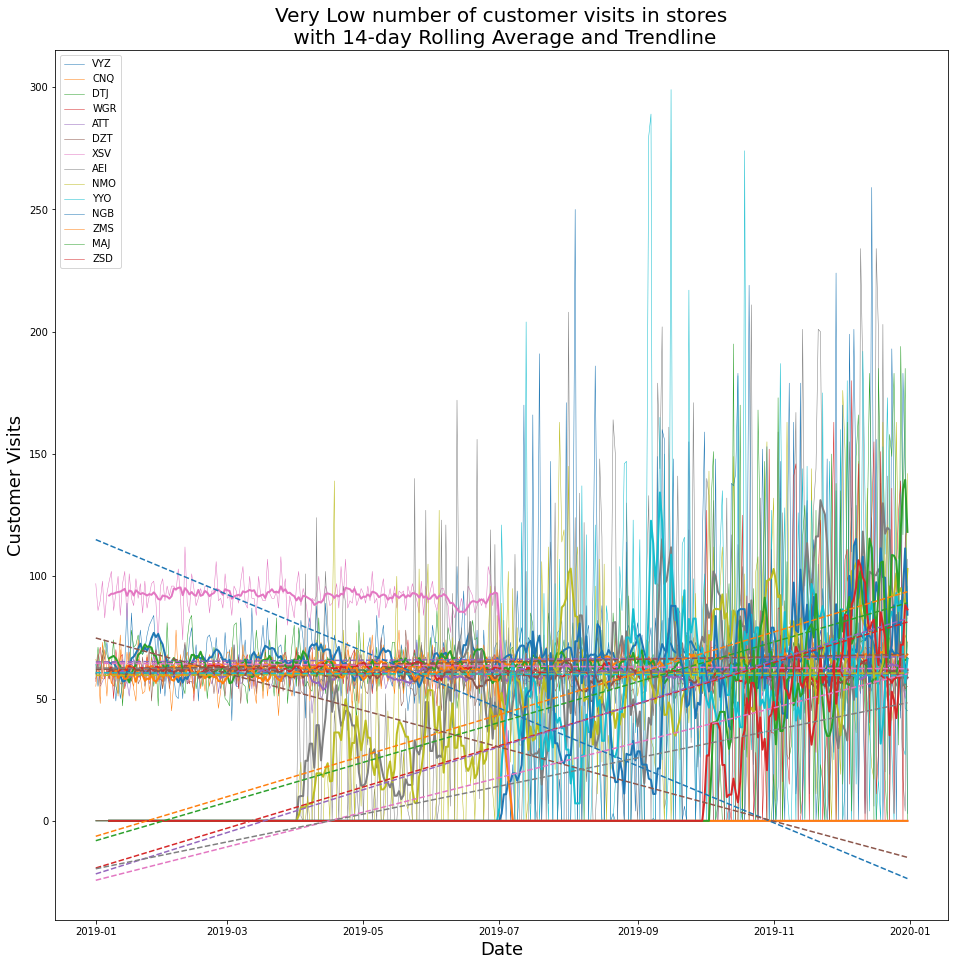

In [ ]:
plt.figure(figsize=(16,16))
plt.plot(data[selected], linewidth=0.5)
plt.gca().set_prop_cycle(None)
plt.plot(rolling_average[selected], linewidth=2)
for name in selected:
    x = np.arange(len(data[name]))
    z = np.polyfit(x, data[name], 1)
    trend = np.poly1d(z)
    plt.plot(data.index, trend(x), linestyle='--')
# plt.ylim(ymin=0)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Customer Visits', fontsize=18)
plt.title('Very Low number of customer visits in stores\n with 14-day Rolling Average and Trendline', fontsize=20)
plt.legend(selected, loc=2)
plt.show()

Here, we can see that two of the store is closing down, where as the three stores are opening after April, July, October respectively.

            VYZ  CNQ  DTJ  WGR  ATT  DZT  ...  NMO  YYO  NGB  ZMS  MAJ  ZSD
Date                                      ...                              
2019-01-01   64   66   60   57   60   58  ...    0    0    0   55    0    0
2019-01-02   55   63   71   66   65   68  ...    0    0    0   63    0    0
2019-01-03   62   59   62   71   55   56  ...    0    0    0   48    0    0
2019-01-04   70   58   65   61   57   68  ...    0    0    0   73    0    0
2019-01-05   66   70   74   58   59   59  ...    0    0    0   62    0    0

[5 rows x 14 columns]
            VYZ  CNQ  DTJ  WGR  ATT  DZT  ...  NMO  YYO  NGB  ZMS  MAJ  ZSD
Date                                      ...                              
2019-12-27   62   71   92   64   58   61  ...  107  101   90    0   31  126
2019-12-28   72   57   45   69   61   52  ...  112  139   42    0  194  139
2019-12-29   81   69   62   64   55   62  ...   93   30  183    0  117    0
2019-12-30   46   76   53   54   50   59  ...   56   27  141    0

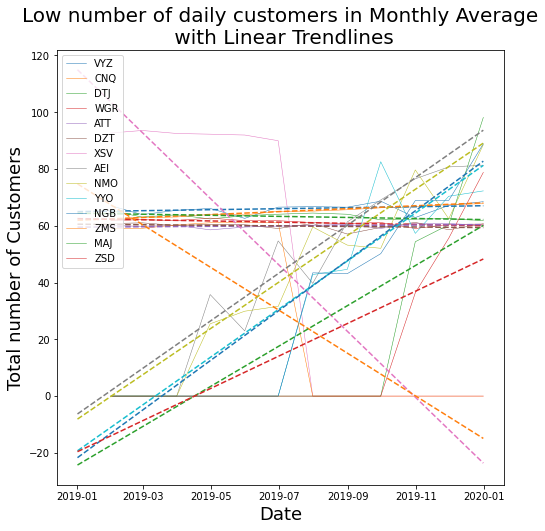

In [ ]:
period = 7
rolling_average = data.rolling(window=period).mean()

print(data[selected].head())
print(data[selected].tail())

plt.figure(figsize=(8, 8))
plt.plot(averaged_data[selected], linewidth=0.5)
plt.gca().set_prop_cycle(None)
for name in selected:
    x = np.arange(len(data[name]))
    z = np.polyfit(x, data[name], 1)
    trend = np.poly1d(z)
    plt.plot(data.index, trend(x), linestyle='--')
# plt.ylim(ymin=0)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Total number of Customers', fontsize=18)
plt.title('Low number of daily customers in Monthly Average\n with Linear Trendlines', fontsize=20)
plt.legend(selected, loc=2)
plt.show()

From this we are sure of the two stores are closing down and 5 new stores are opening during the year.

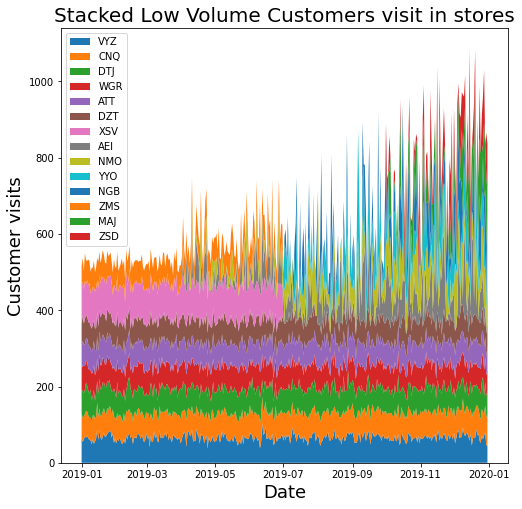

In [ ]:
data = data.reindex(data.sum().sort_values(ascending=False).index, axis=1)

selected = ['VYZ', 'CNQ', 'DTJ', 'WGR', 'ATT', 'DZT', 'XSV', 'AEI', 'NMO', 'YYO', 'NGB', 'ZMS', 'MAJ', 'ZSD']

plt.figure(figsize=(8,8))

plt.stackplot(data.index, data[selected].transpose())
plt.xlabel('Date', fontsize=18)
plt.ylabel('Customer visits', fontsize=18)
plt.title('Stacked Low Volume Customers visit in stores', fontsize=20)
plt.legend(selected, loc=2)
plt.show()

Area plot that demonstrates the new and close stores in more clear way.

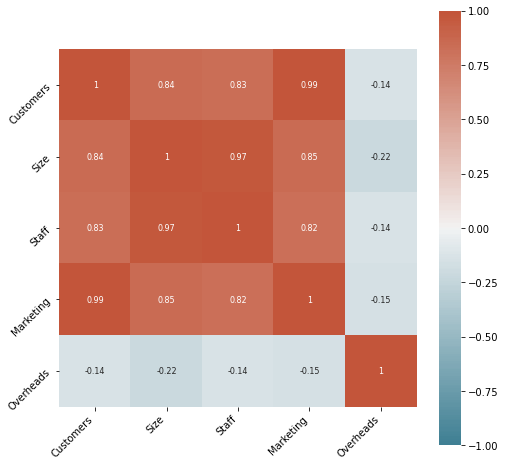

In [ ]:
plt.figure(figsize=(8, 8))
corr = summary_data.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(220, 20, n=200), square=True, annot=True,
                 annot_kws={"size": 8})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=45, horizontalalignment='right')
plt.show()

Heat map to show the correlation between the summary data frame.

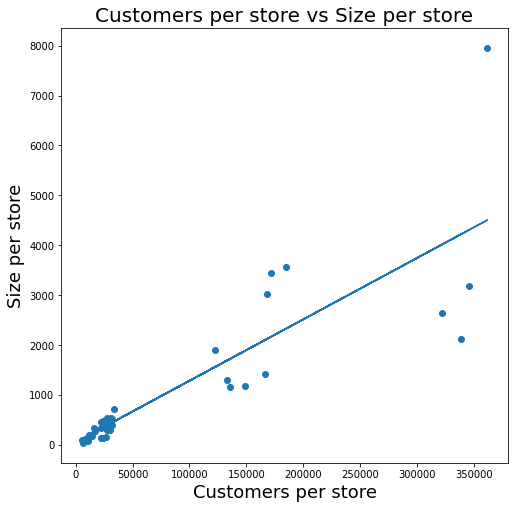

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(summary_data['Customers'], summary_data['Size'])
z = np.polyfit(summary_data['Customers'], summary_data['Size'], 1)
trend = np.poly1d(z)
plt.plot(summary_data['Customers'], trend(summary_data['Customers']))
plt.title('Customers per store vs Size per store', fontsize=20)
plt.xlabel('Customers per store', fontsize=18)
plt.ylabel('Size per store', fontsize=18)
plt.show()

Scatter plot to show the correlation betweem the customers and size of store.

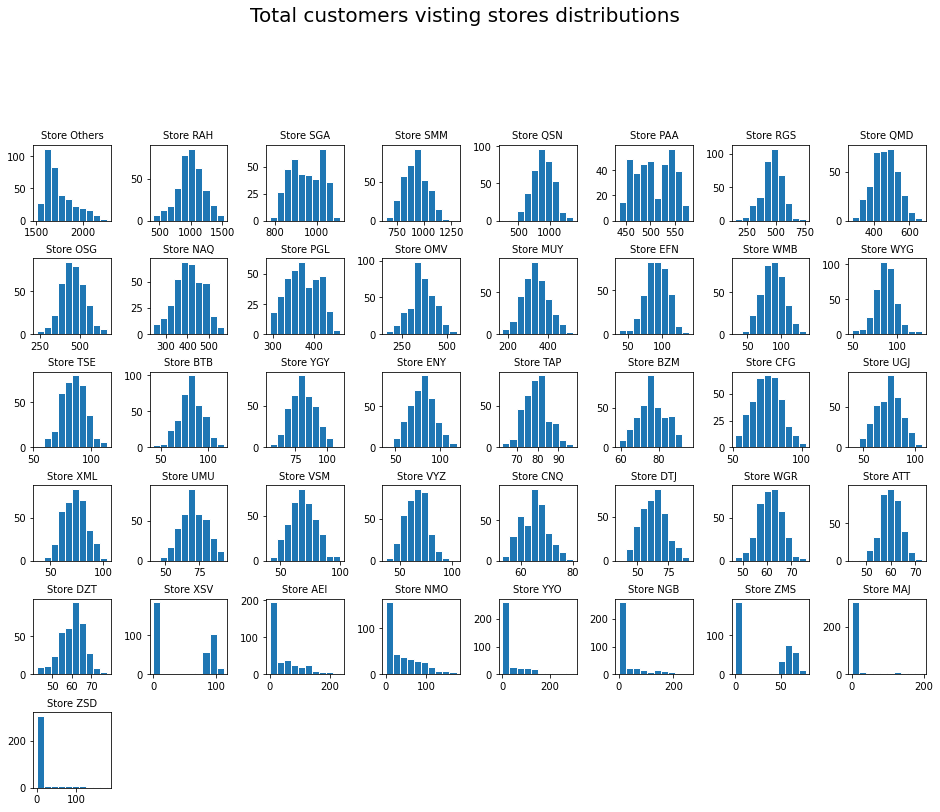

In [ ]:
counter = 1
fig = plt.figure(figsize=(16,16))
fig.suptitle('Total customers visting stores distributions', fontsize=20, position=(0.5, 1.0))
for name in data:
    sub = fig.add_subplot(8,8, counter)
    sub.set_title('Store ' + name, fontsize=10)
    sub.hist(data[name], edgecolor='w')
    counter += 1
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

A histogram to show the distribution of the stores

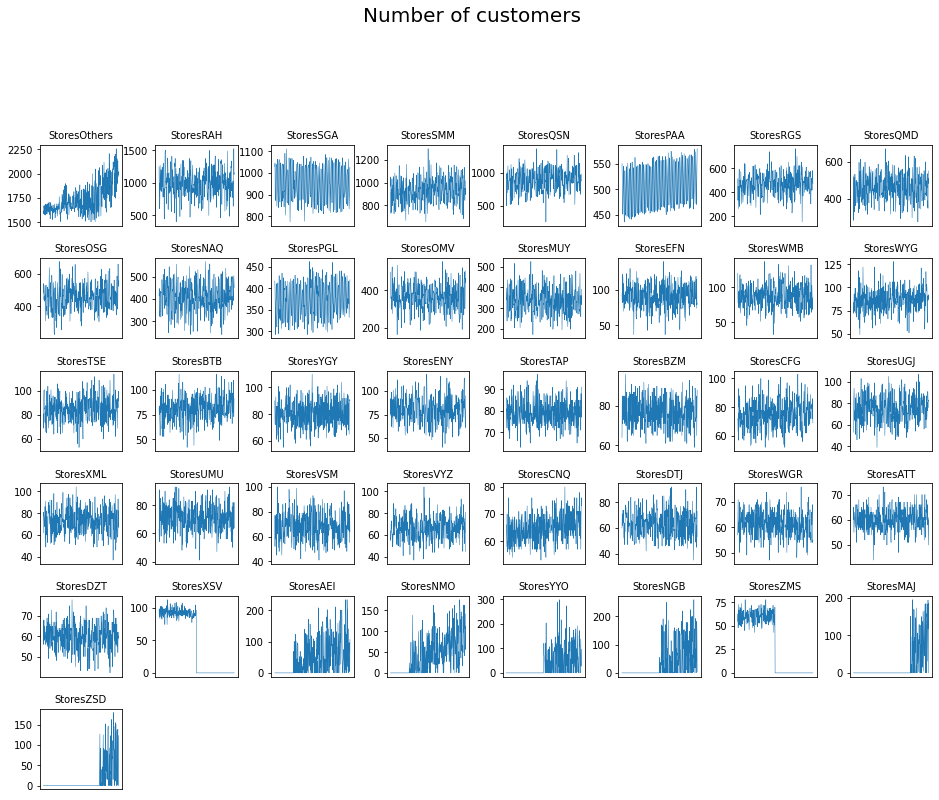

In [ ]:
counter = 1
fig = plt.figure(figsize=(16,16))
fig.suptitle('Number of customers', fontsize=20, position=(0.5, 1.0))
for name in data.columns:
    sub = fig.add_subplot(8, 8, counter)
    sub.set_title('Stores' + name, fontsize=10)
    sub.plot(data.index, data[name], linewidth=0.5)
    sub.axes.get_xaxis().set_ticks([])  # remove the x ticks
    counter += 1
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

From the line plots, we can define some stores having customers in a series.

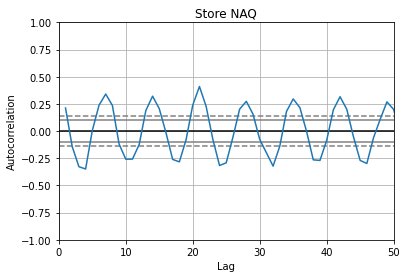

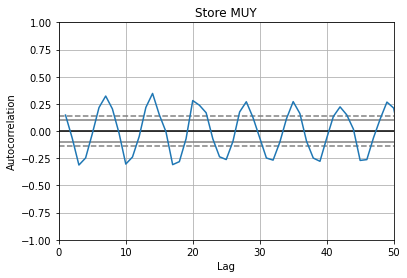

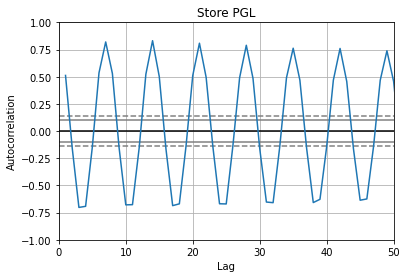

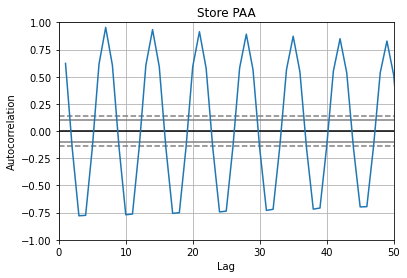

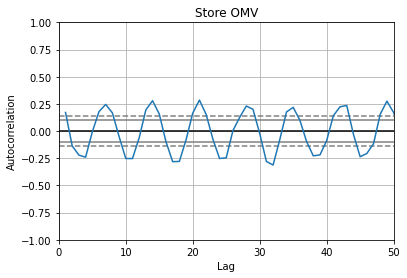

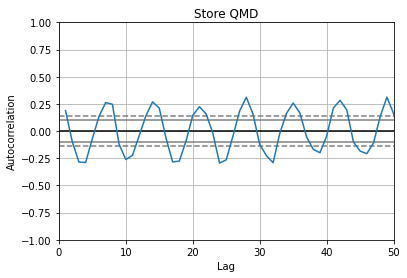

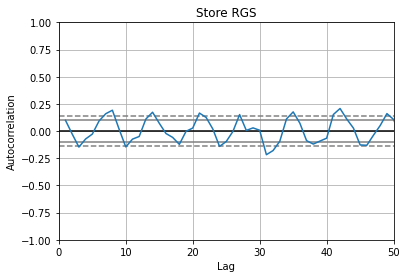

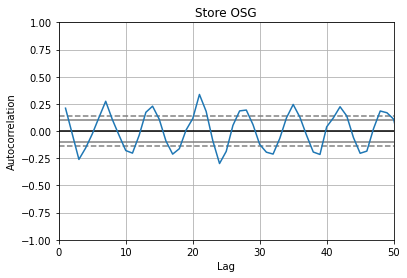

In [ ]:
selected = ['NAQ', 'MUY', 'PGL', 'PAA', 'OMV', 'QMD', 'RGS', 'OSG']

for name in selected:
    pd.plotting.autocorrelation_plot(data[name])
    plt.xlim([0, 50]) # uncomment this line to zoom in
    plt.title('Store ' + name)
    plt.show()

We can see some strong correlation that is >0.5 and mainly it follows the pattern weekly.

     Customers      Size     Staff  Marketing  Overheads
NAQ   0.410685  0.147776  0.238095   0.390244   0.606061
BZM   0.077148  0.061448  0.095238   0.073171   0.484848
MUY   0.339252  0.239382  0.214286   0.292683   0.272727
PGL   0.374669  0.145011  0.166667   0.341463   0.343434
ZSD   0.014475  0.013697  0.023810   0.024390   0.656566


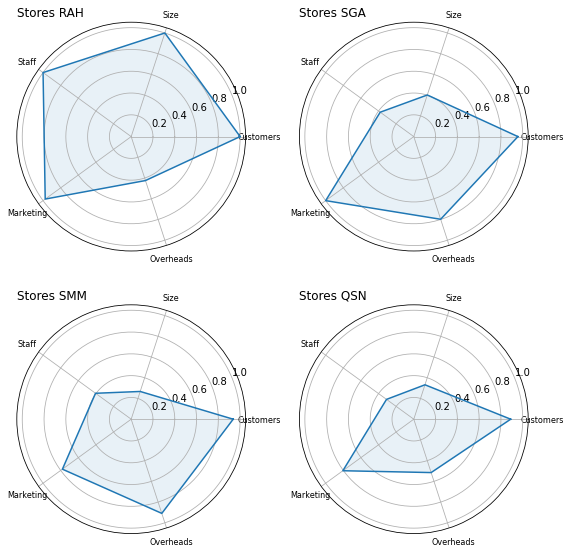

In [ ]:
normalised_data = summary_data / summary_data.max()
print(normalised_data.head())

selected = ['RAH', 'SGA', 'SMM', 'QSN']

n_attributes = len(normalised_data.columns)
angles = [n / float(n_attributes) * 2 * np.pi for n in range(n_attributes + 1)]
plt.figure(figsize=(8, 8))
counter = 1
for name in selected:
    values = normalised_data.loc[[name]].values.flatten().tolist()
    values += values[:1]
    sub = plt.subplot(2, 2, counter, polar=True)
    sub.plot(angles, values)
    sub.fill(angles, values, alpha=0.1)
    sub.set_ylim(ymax=1.05)
    sub.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    sub.set_xticks(angles[0:-1])
    sub.set_xticklabels(normalised_data.columns, fontsize=8)
    sub.set_title('Stores ' + name, fontsize=12, loc='left')
    counter += 1
plt.tight_layout()
plt.show()

A radar plot with the high category store to see correlation between them.

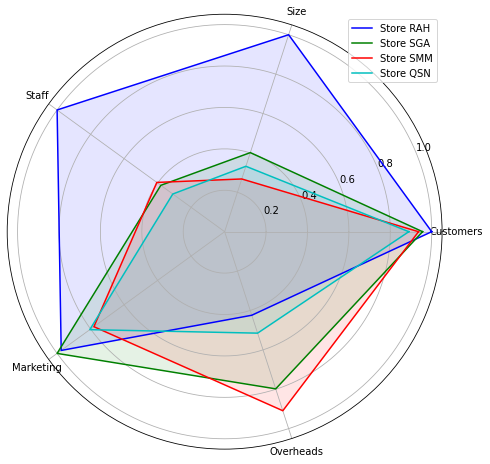

In [ ]:
n_attributes = len(normalised_data.columns)
angles = [n / float(n_attributes) * 2 * np.pi for n in range(n_attributes + 1)]
colours = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
c = 0
plt.figure(figsize=(8, 8))
sub = plt.subplot(1, 1, 1, polar=True)
for name in selected:
    values = normalised_data.loc[[name]].values.flatten().tolist()
    values += values[:1]
    sub.plot(angles, values, colours[c % len(colours)], label='Store ' + name)
    sub.fill(angles, values, colours[c % len(colours)], alpha=0.1)
    sub.set_ylim(ymax=1.05)
    sub.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    sub.set_xticks(angles[0:-1])
    sub.set_xticklabels(normalised_data.columns)
    c += 1
plt.legend(loc=1)
plt.show()

Radar plot with all high stores together.

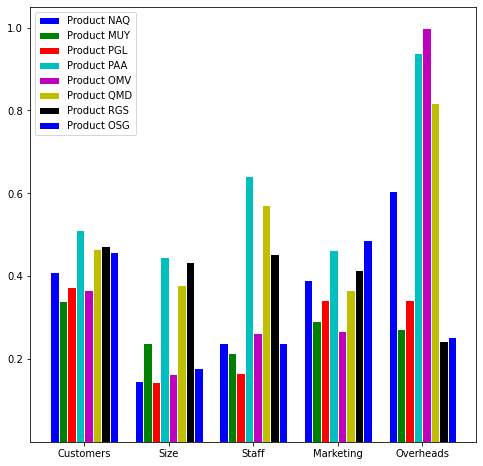

In [ ]:
selected = ['NAQ', 'MUY', 'PGL', 'PAA', 'OMV', 'QMD', 'RGS', 'OSG']  # high volume
colours = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
plt.figure(figsize=(8, 8))
c = 0
n_bars = len(selected)
x_pos_base = np.arange(len(summary_data.columns))
bar_width = 0.8 / n_bars
for name in selected:
    values = normalised_data.loc[[name]].values.flatten().tolist()
    x_pos = [x + (bar_width * c) for x in x_pos_base]
    plt.bar(x_pos, values, color=colours[c % len(colours)],
            width=bar_width, edgecolor='white', label='Product ' + name)
    c += 1
plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0])
x_pos = [x + (bar_width * (c - 1) / 2) for x in x_pos_base]
plt.xticks(x_pos, summary_data.columns)
plt.legend()
plt.show()


Bar chart for medium range stores.

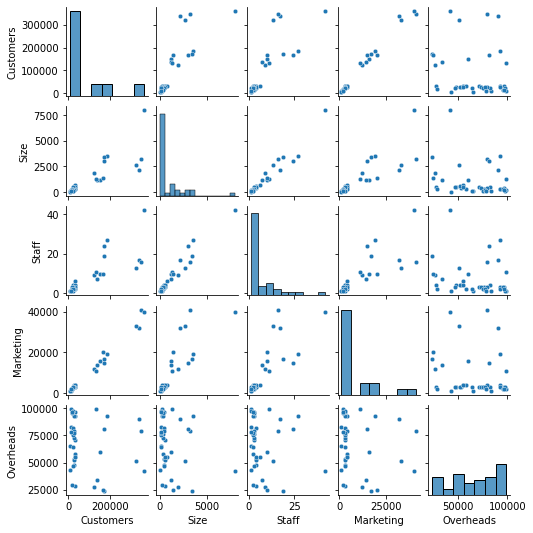

In [ ]:
sns.pairplot(summary_data, height=1.5, plot_kws={'s': 20})
plt.show()

pair plot to understand all features better.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
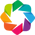

:Scatter   [Marketing]   (Staff,BubbleSize,index,Customers,Size,Overheads)

In [ ]:
summary_data['BubbleSize'] = summary_data['Customers'] *0.01

plot = summary_data.hvplot.scatter(
    frame_height=500, frame_width=500,
    title='Marketing vs Staff (vs Customers)',
    xlabel='Marketing (£)', ylabel='Staff',
    alpha=0.5, padding=0.1, hover_cols='all',
    tools=['pan', 'box_zoom', 'wheel_zoom', 'undo', 'redo', 'hover', 'save', 'reset'],
    x='Marketing', y='Staff', size='BubbleSize',
)

hv.extension('bokeh')
plot

Using a bubble plot, it can be seen the relation between customers vs the comparison of marketing and staff. It is clearly shown that if marketing and staff are more , then the customers are bound to increase.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
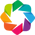

:Scatter   [Customers]   (Staff,BubbleSize,index,Size,Marketing,Overheads)

In [ ]:
summary_data['BubbleSize'] = summary_data['Size'] * 0.5

plot = summary_data.hvplot.scatter(
    frame_height=500, frame_width=500,
    title='Customers vs Staff (vs Size)',
    xlabel='Customers', ylabel='Staff',
    alpha=0.5, padding=0.1, hover_cols='all',
    tools=['pan', 'box_zoom', 'wheel_zoom', 'undo', 'redo', 'hover', 'save', 'reset'],
    x='Customers', y='Staff', size='BubbleSize',
)

hv.extension('bokeh')
plot

Similarly as earlier, we can see correlation here using the zoom feature in the interactive plots.We can save the photo, undo and see interactions there three times in three different sections.